<a href="https://colab.research.google.com/github/paulapipkin/Logistic_Random-forest_KNN/blob/main/00_Logistic%2C_Random_forest%2C_or_KNN%3F_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic, Random forest, or KNN? (Core)

- Paula Pipkin
- 8/2

In [33]:
#load prepare data
import pandas as pd
import numpy as np

#prepare for ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

#plot
import matplotlib.pyplot as plt

#customize
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')


In [34]:
#load data
df = pd.read_csv('/content/drive/MyDrive/BootCamp/05 - 08 - MACHINE LEARNING/03 Week 07 - Classification Models/wisconsinBreastCancer - wisconsinBreastCancer.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1) Use a logistic regression model and try tuning both L1 ('l1') and L2 ('l2') regularization. This is a great opportunity to see how tuning hyperparameters can affect the model results. Keep in mind that you may need to change the solver as well.  Check the documentation for LogisticRegression.

Remember to evaluate your classification models using multiple metrics!

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
print(df.isna().sum().sum())
print(df.duplicated().sum())

0
0


In [37]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

.score() could be calculate with object type , but I'm adding this step so I can calculat and create a confunsion matrix, recall and precision metrics

In [38]:
df['diagnosis']= df['diagnosis'].replace({'B':0, 'M':1})

In [39]:
#prepare/split data

X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


###Logistic Regression Model

In [40]:
# Logistic Regression Model Instance
log_reg = LogisticRegression()

# Logistic Regression requires scaling:
scaler = StandardScaler()

# Put scaler and model in a pipeline
log_reg_pipe = make_pipeline(scaler, log_reg)

#get parameters
log_reg_pipe.get_params()

{'logisticregression': LogisticRegression(),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False}

In [41]:
# I removed lbfgs from the grid because of the error:' ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty'
# use parameters to create a GS
reg_pipe_param_grid = {'logisticregression__penalty': ['l1','l2'],
                       'logisticregression__solver':[ 'liblinear'], 
                       'logisticregression__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                       'logisticregression__max_iter': [1000]}
              

In [42]:
#gridsearch "pipe"
reg_pipe_gs = GridSearchCV(log_reg_pipe, reg_pipe_param_grid)

In [43]:
reg_pipe_gs.fit(X_train, y_train)



GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000],
                         'logisticregression__max_iter': [1000],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear']})

In [44]:
#best parameters
reg_pipe_gs.best_params_

{'logisticregression__C': 1,
 'logisticregression__max_iter': 1000,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [45]:
# accuracy score from best parameters
reg_best_pipe = reg_pipe_gs.best_estimator_
reg_best_pipe.fit(X_train, y_train)
best_score_log = reg_best_pipe.score(X_test, y_test)
best_score_log

0.9790209790209791

In [46]:
#making predictions to evaluate other metrics
log_reg_pred_train = reg_best_pipe.predict(X_train)
log_reg_pred_test = reg_best_pipe.predict(X_test)

### 2) Then, try creating and tuning KNN and Random Forest models and see if you can get better metrics. 

---



---



###Random Forest 

In [47]:
#this time I'll fit the model before getting parameters just to define the range I will use in the Grid
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [48]:
rf_param_grid ={ 'max_depth':range(1,20),  'n_estimators': [ 10, 30, 60, 100, 120]  }

In [17]:
#gridsearch "pipe"
rf_pipe_gs = GridSearchCV(rf, rf_param_grid)
rf_pipe_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 20),
                         'n_estimators': [10, 30, 60, 100, 120]})

In [18]:
rf_pipe_gs.best_params_
rf_best_pipe = rf_pipe_gs.best_estimator_
best_score_rf = rf_best_pipe.score(X_test, y_test)
best_score_rf 

0.965034965034965

In [19]:
#making predictions to evaluate other metrics
rf_pred_train = rf_best_pipe.predict(X_train)
rf_pred_test = rf_best_pipe.predict(X_test)

###KNN

In [20]:
scaler = StandardScaler()
knn = KNeighborsClassifier() 
knn_pipe = make_pipeline(scaler, knn)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [21]:
knn_param_grid ={'n_neighbors':range(1,20)}

In [22]:
#gridsearch "pipe"
knn_pipe_gs = GridSearchCV(knn, knn_param_grid)
knn_pipe_gs.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [23]:
knn_pipe_gs.best_params_
knn_best_pipe = knn_pipe_gs.best_estimator_
best_score_knn = knn_best_pipe.score(X_test, y_test)
best_score_knn

0.958041958041958

In [24]:
knn_pred_train = knn_best_pipe.predict(X_train)
knn_pred_test = knn_best_pipe.predict(X_test)



###Recall and Precsision Function

In [25]:
def rec_prec(train, test, pred_train, pred_test, model_name):
  recall_train = recall_score(train,pred_train)
  recall_test = recall_score(test,pred_test)
  precision_train = precision_score(train,pred_train)
  precision_test = precision_score(test,pred_test)
  score_df = pd.DataFrame(index=['Recall Train', 'Recall Test','Precision Train', 'Precision Test'], columns= [str(model_name)])
  score_df.loc['Recall Train'] = recall_train.round(4)
  score_df.loc['Recall Test'] = recall_test.round(4)
  score_df.loc['Precision Train'] = precision_train.round(4)
  score_df.loc['Precision Test'] = precision_test.round(4)
  return score_df

###Confusion Matrix Function

In [26]:
def cm(y, predictions):
  return ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=['Begnin', 'Malignant'], cmap='Blues');



---



---



###Metrics

In [27]:
log_reg_metrics = rec_prec(y_train,y_test,log_reg_pred_train,log_reg_pred_test,'LogReg')
rf_metrics = rec_prec(y_train,y_test,rf_pred_train,rf_pred_test,'RF')
knn_metrics = rec_prec(y_train,y_test,knn_pred_train,knn_pred_test,'KNN')

###Accuracy scores, 
- P.S. the function .score() calls accuracy_score, so using .score() for classification will give you the same results

In [28]:
best_scores = pd.DataFrame({'LogReg':best_score_log,'RF':best_score_rf,'KNN':best_score_knn }, index=[0])
best_scores

,LogReg,RF,KNN
0,0.979021,0.965035,0.958042


### Recall and precision

In [29]:
results =pd.concat([log_reg_metrics, rf_metrics, knn_metrics], axis=1)
results

,LogReg,RF,KNN
Recall Train,0.9747,0.9873,0.8734
Recall Test,0.9815,0.9444,0.9259
Precision Train,0.9872,1.0,0.9517
Precision Test,0.9636,0.9623,0.9615


### Confusion Matrix

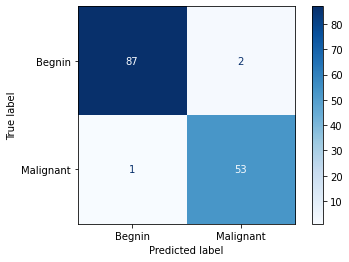

In [30]:
plot_log = cm(y_test,log_reg_pred_test)
plot_log;

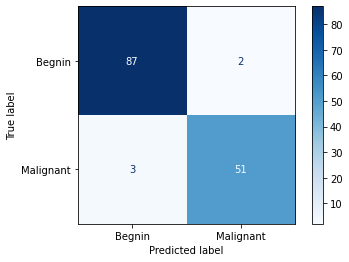

In [31]:
plot_rf = cm(y_test,rf_pred_test)
plot_rf;

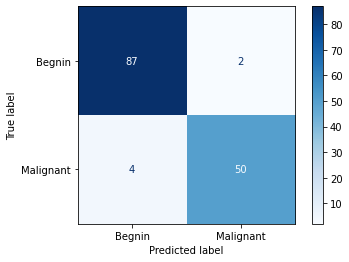

In [32]:
plot_knn = cm(y_test,knn_pred_test)
plot_knn;

###3) Address these questions in a text cell at the end of your code:

a) Which hyperparameters did you tune for each of the models? 

b) Which model would you put into production to diagnose malignant tumors?

c) How does consideration of the meaning of false positive and false negative errors affect how you determine what 'best' means in this case?


a) Tunes:

**Logistic Regrassion:** 
- Solver = I removed lbfgs from the grid because it only supports 'l2'
- Penalty= Used both L1 and L2
- C (the inverse of regularization strength)= [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
- Max_iter = increased to 1000

**Random Forest:** 
- max_depth = from 1 - 20 exclusive - based on the first fit
- n_estimators = [ 10, 30, 60, 100, 120]

**KNN:** 
- n_neighbors = from 1 - 20 exclusive

b) **Based on the results for Recall and Precision I would choose Logistic Regression**

c) **For this case, having a false nagative is more harming, bacause the patient would proceed without treatment**